#Digit Recognition using *Neural Network*

*   Keras
*   Tensorflow





In [63]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [11]:
print('X_train:-',len(X_train))
print('y_train:-',len(y_train))
print('X_test:-',len(X_test))
print('y_test:-',len(y_test))


X_train:- 60000
y_train:- 60000
X_test:- 10000
y_test:- 10000


In [15]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

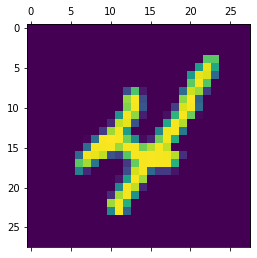

In [20]:
plt.matshow(X_train[9])

first 10 numbers in y_train

In [21]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [22]:
X_train.shape

(60000, 28, 28)

In [30]:
X_test.shape

(10000, 28, 28)

#Scaling the data

In [35]:
X_train=X_train/255
X_test=X_test/255

In [36]:
X_train_2 = X_train.reshape(len(X_train),28*28)
X_test_2= X_test.reshape(len(X_test),28*28)

In [37]:
print(X_train_2.shape)
print(X_test_2.shape)

(60000, 784)
(10000, 784)


In [38]:
X_train_2[7]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [53]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_2,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.7078 - accuracy: 0.8180
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3061 - accuracy: 0.9161
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2813 - accuracy: 0.9216
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2677 - accuracy: 0.9236
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2738 - accuracy: 0.9230


"model.compile(optimizer='adam',\n              loss='sparse_categorical_crossentropy',\n              metrics=['accuracy'])\n\nmodel.fit(X_train_2, y_train, epochs=5)"

In [54]:
model.evaluate(X_test_2,y_test)

313/313 [==============================] - 0s 940us/step - loss: 0.2704 - accuracy: 0.9245


[0.27037689089775085, 0.9244999885559082]

In [57]:
y_pred=model.predict(X_test_2)
y_pred[7]

array([2.8787103e-06, 2.4357405e-01, 1.2007624e-02, 4.5566767e-02,
       4.1473255e-01, 2.3095229e-01, 1.7006397e-03, 2.3745269e-02,
       1.7955178e-01, 9.7970754e-01], dtype=float32)

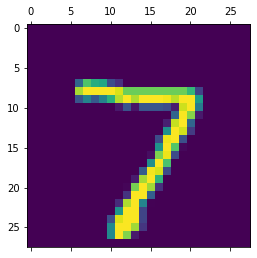

In [58]:
plt.matshow(X_test[0])

In [61]:
y_predicted_labels = [np.argmax(i) for i in y_pred]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [62]:
matrix = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
matrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    0,    0,    2,    0,    4,    6,    2,    2,    0],
       [   0, 1110,    3,    2,    0,    1,    4,    2,   13,    0],
       [   8,   10,  900,   19,   11,    4,   12,   12,   54,    2],
       [   3,    0,   13,  929,    0,   19,    3,   12,   26,    5],
       [   2,    1,    3,    1,  925,    0,   10,    4,   11,   25],
       [   8,    3,    1,   33,   12,  768,   19,    6,   37,    5],
       [  12,    3,    3,    2,    8,    9,  914,    2,    5,    0],
       [   1,    5,   20,    9,    9,    0,    0,  956,    7,   21],
       [   6,    8,    6,   21,    9,   19,   10,   12,  879,    4],
       [  11,    7,    1,   11,   33,    6,    0,   29,   11,  900]],
      dtype=int32)>

Text(123.0, 0.5, 'True')

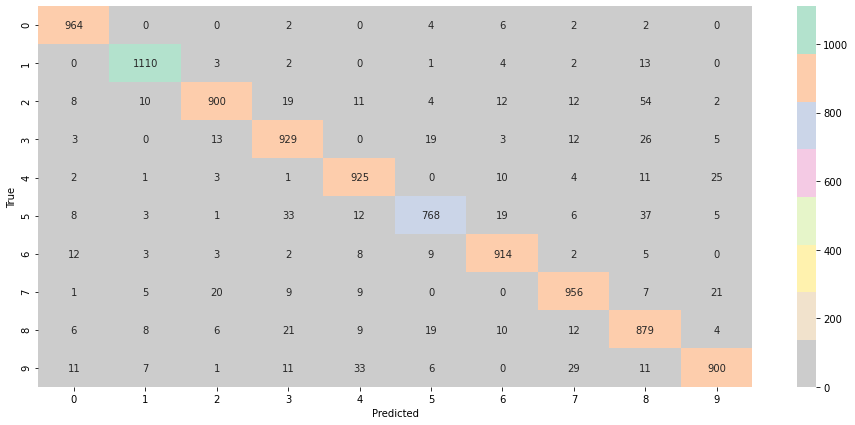

In [87]:
plt.figure(figsize = (16,7))
sns.heatmap(matrix, annot=True,fmt='d',cmap='Pastel2_r')
plt.xlabel('Predicted')
plt.ylabel('True')

#Hidden Layers

*Hidden layers* make neural networks superior to most of the machine learning algorithms.

In [75]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_2, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4467 - accuracy: 0.8757
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1272 - accuracy: 0.9623
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0840 - accuracy: 0.9748
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0628 - accuracy: 0.9806
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0484 - accuracy: 0.9850


Text(123.0, 0.5, 'True')

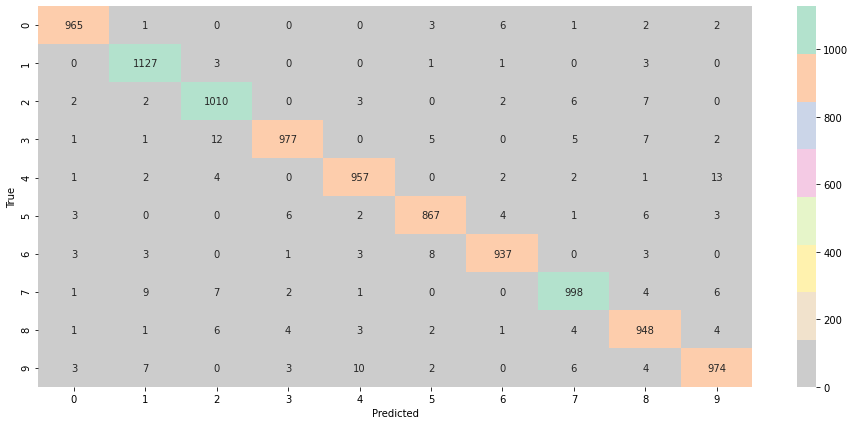

In [89]:
y_pred = model.predict(X_test_2)
y_predicted_labels = [np.argmax(i) for i in y_pred]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (16,7))
sns.heatmap(cm, annot=True, fmt='d',cmap='Pastel2_r')
plt.xlabel('Predicted')
plt.ylabel('True')

In [79]:
model.evaluate(X_test_2,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0746 - accuracy: 0.9760


[0.07457270473241806, 0.9760000109672546]